In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pyecharts
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,}

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


# 读取数据

In [3]:
d1 = pd.read_csv('student-mat.csv', sep=';')

In [5]:
d2 = pd.read_csv('student-por.csv', sep=';')

In [6]:
d1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
d2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# 数据整合

In [21]:
df = pd.merge(d1,d2, how='outer')

# 查看缺失值和Nan值

In [22]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

# 处理重复值
虽然也没有重复值，还是处理一下

In [24]:
df = df.drop_duplicates()

# 保存干净的数据

In [27]:
df.to_csv('干净数据.csv')

# 分析数据类型

In [2]:
f = open('干净数据.csv')
df = pd.read_csv(f, index_col=0)

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 分析学校

Text(0.5,1,'Number of students from different schools')

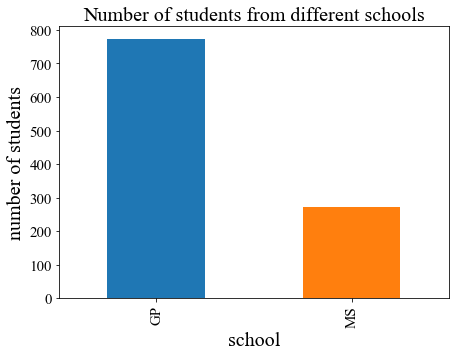

In [4]:
df_school = df.groupby('school')
df_school.size().plot(kind='bar', 
                      figsize=(7,5) ,
                       fontsize=15
                                 )
plt.ylabel('number of students', font1)
plt.xlabel('school', font1)
plt.title('Number of students from different schools', font1)

Text(0.5,1,'final garde divided by school')

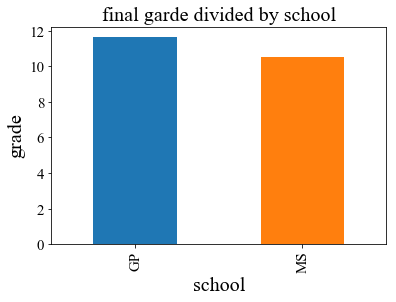

In [5]:
(df_school['G3'].sum() / df_school.count()['G3']).plot(kind='bar',
                                                       fontsize=15,)
plt.ylabel('grade', font1)
plt.xlabel('school', font1)
plt.title('final garde divided by school', font1)

## 分析性别

Text(0,0.5,'grade')

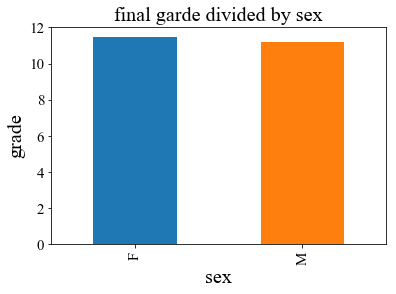

In [6]:
df_sex = df.groupby('sex')
(df_sex.sum()['G3'] / df_sex.count()['G3']).plot(kind='bar',
                                                 fontsize=15)
plt.title('final garde divided by sex',font1)
plt.xlabel('sex',font1)
plt.ylabel('grade',font1)

In [7]:
df_sex.size().index

Index(['F', 'M'], dtype='object', name='sex')

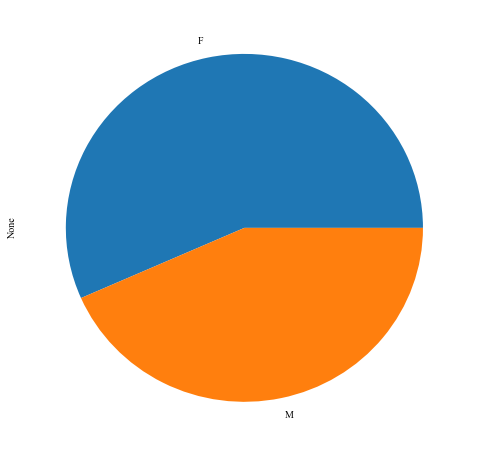

In [11]:
df_sex.size().plot.pie(figsize=(8,8))

In [12]:
df_school_sex = df.groupby(['sex','school'])

In [13]:
bar = pyecharts.Bar("number of sexes per school")
bar.add("M", ['GP','MS'], df_school_sex.size().M.values, is_stack=True)
bar.add('F', ['GP','MS'], df_school_sex.size().F.values, is_stack=True)

In [14]:
df_school_sex.size()

sex  school
F    GP        420
     MS        171
M    GP        352
     MS        101
dtype: int64

Text(0,0.5,'sex count')

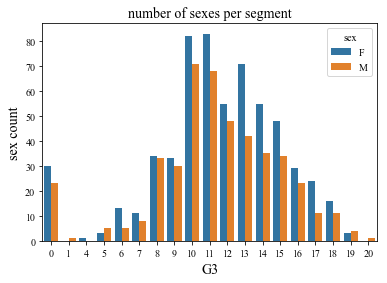

In [11]:
sns.countplot(x='G3', hue='sex', data=df)
plt.title('number of sexes per segment',font2)
plt.xlabel('G3',font2)
plt.ylabel('sex count',font2)

## 分析地址

Text(0,0.5,'address count')

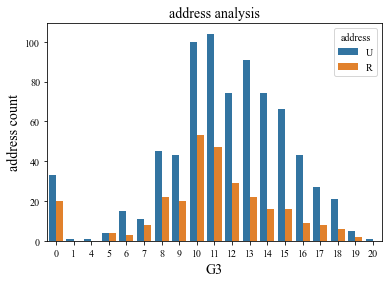

In [12]:
sns.countplot(x='G3',hue='address',data=df)
plt.title('address analysis',font2)
plt.xlabel('G3',font2)
plt.ylabel('address count',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

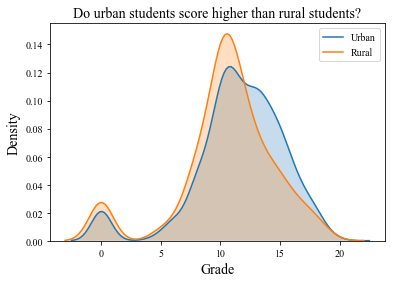

In [13]:
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', font2)
plt.xlabel('Grade', font2);
plt.ylabel('Density', font2)

## 分析年龄

Text(0,0.5,'count')

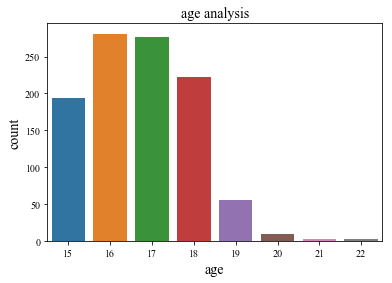

In [14]:
sns.countplot(x='age',data=df)
plt.title('age analysis',font2)
plt.xlabel('age',font2)
plt.ylabel('count',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


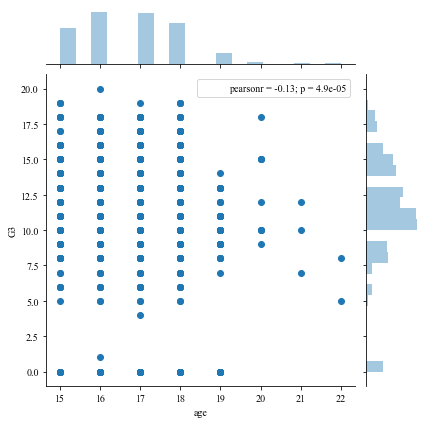

In [15]:
sns.jointplot(x='age',y='G3', data=df)

In [23]:
bar = pyecharts.Bar("age analysis")
bar.add("G1", df.age, df.G1, is_stack=True)
bar.add("G2", df.age, df.G2, is_stack=True)
bar.add("G3", df.age, df.G3, is_stack=True)

## 父母方面

### 父母同居或者分开

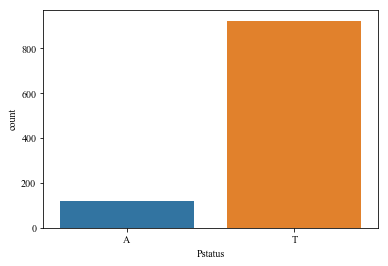

In [32]:
sns.countplot(df.Pstatus)

Text(0,0.5,'G3')

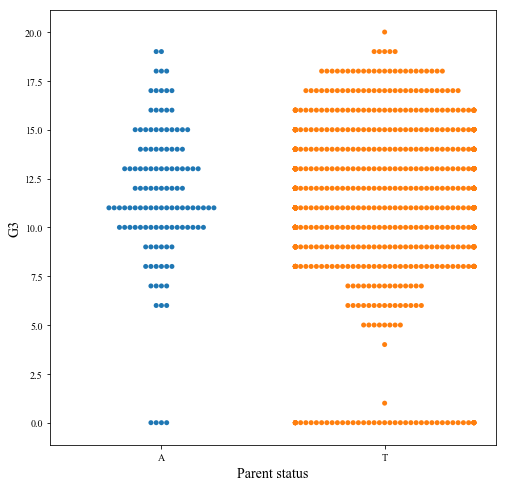

In [35]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='Pstatus', y='G3', data=df)
plt.xlabel('Parent status', font2)
plt.ylabel('G3', font2)

### 父母教育

Text(0,0.5,'G3')

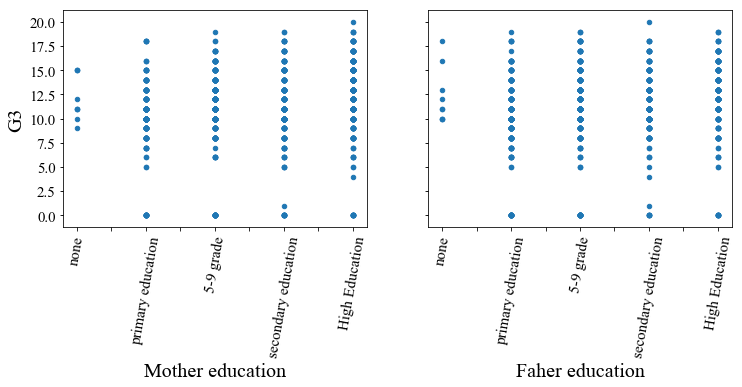

In [82]:
fig,axes=plt.subplots(1,2,sharey=True,figsize=(12,4))
df.plot.scatter(x='Medu',y='G3', fontsize=15, rot=80, ax=axes[0])

axes[0].set_xlabel('Mother education', font1)
axes[0].set_xticklabels(['','none','','primary education','','5-9 grade','','secondary education','','High Education'])
axes[0].set_ylabel('G3', font1)
df.plot.scatter(x='Fedu',y='G3', fontsize=15, rot=80, ax=axes[1])
axes[1].set_xlabel('Faher education', font1)
axes[1].set_xticklabels(['','none','','primary education','','5-9 grade','','secondary education','','High Education'])
axes[1].set_ylabel('G3', font1)

Text(0.5,1,'Parent education influence')

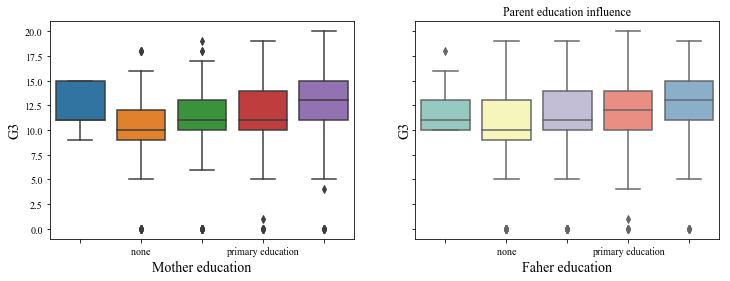

In [90]:
fig,axes=plt.subplots(1,2,sharey=True, figsize=(12,4))
sns.boxplot(x="Medu",y="G3",data=df,ax=axes[0]) #左图
axes[0].set_xlabel('Mother education', font2)
axes[0].set_xticklabels(['','none','','primary education','','5-9 grade','','secondary education','','High Education'])
axes[0].set_ylabel('G3', font2)
sns.boxplot(x="Fedu",y="G3",data=df,palette="Set3",ax=axes[1]) #右图
axes[1].set_xlabel('Faher education', font2)
axes[1].set_xticklabels(['','none','','primary education','','5-9 grade','','secondary education','','High Education'])
axes[1].set_ylabel('G3', font2)
plt.title('Parent education influence')

### 父母工作

Text(0.5,1,'Parent job influence')

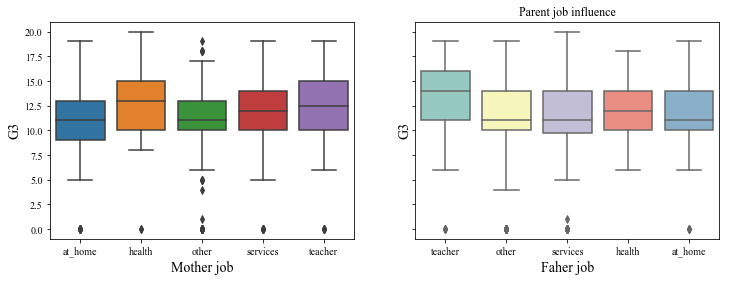

In [91]:
fig,axes=plt.subplots(1,2,sharey=True, figsize=(12,4))
sns.boxplot(x="Mjob",y="G3",data=df,ax=axes[0]) #左图
axes[0].set_xlabel('Mother job', font2)
axes[0].set_ylabel('G3', font2)
sns.boxplot(x="Fjob",y="G3",data=df,palette="Set3",ax=axes[1]) #右图
axes[1].set_xlabel('Faher job', font2)
axes[1].set_ylabel('G3', font2)
plt.title('Parent job influence')

## 成绩分析

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


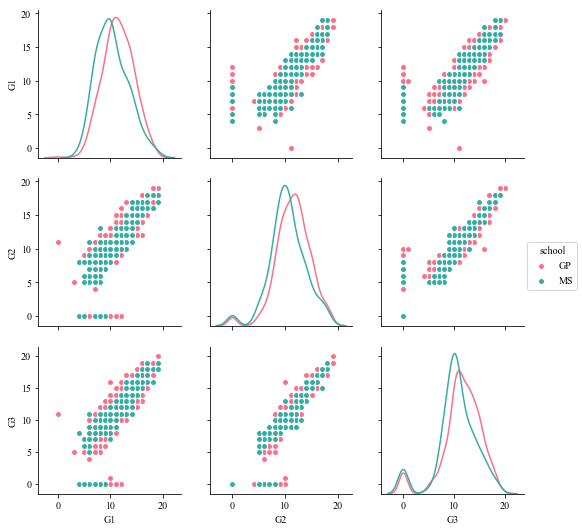

In [39]:
sns.pairplot(df[['G1','G2','G3','school']], hue='school', diag_kind = 'kde',palette="husl")

Text(0.5,1,'G3')

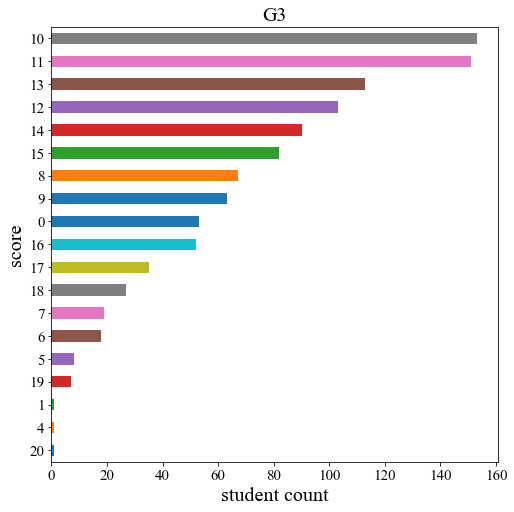

In [17]:
df['G3'].value_counts().sort_values().plot.barh(figsize=(8,8), fontsize=15)
plt.xlabel('student count', font1)
plt.ylabel('score', font1)
plt.title('G3', font1)

Text(0.5,1,'hist of G3')

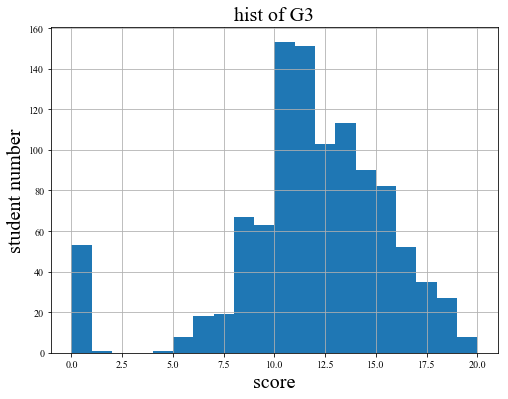

In [21]:
df['G3'].hist(bins=20, figsize=(8,6))
plt.xlabel('score', font1)
plt.ylabel('student number', font1)
plt.title('hist of G3', font1)

## 挂科数

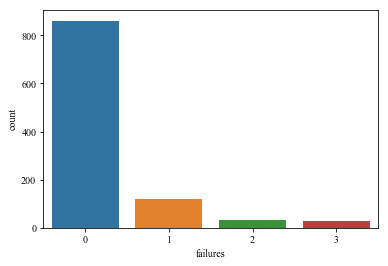

In [92]:
sns.countplot(x='failures', data=df)

Text(0,0.5,'G3')

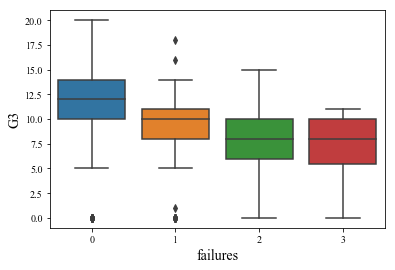

In [96]:
sns.boxplot(x="failures",y="G3",data=df) #左图
plt.xlabel('failures', font2)
plt.ylabel('G3', font2)

## reason

Text(0.5,1,'different reason to choose school')

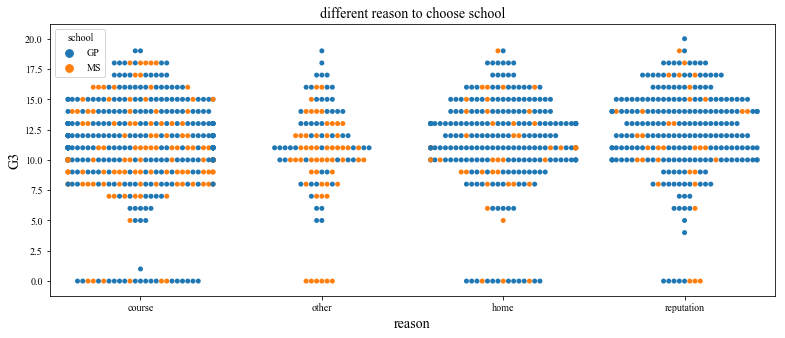

In [44]:
plt.figure(figsize=(13,5))
sns.swarmplot(x='reason', y='G3', data=df,  hue='school')
plt.xlabel('reason', font2)
plt.ylabel('G3', font2)
plt.title('different reason to choose school',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'different reason to choose school')

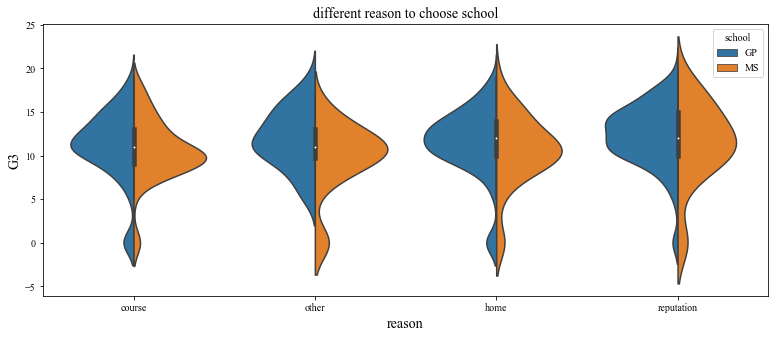

In [49]:
plt.figure(figsize=(13,5))
sns.violinplot(x='reason', y='G3', data=df,  hue='school', split=True)
plt.xlabel('reason', font2)
plt.ylabel('G3', font2)
plt.title('different reason to choose school',font2)

Text(0.5,1,'number of reason to choose school')

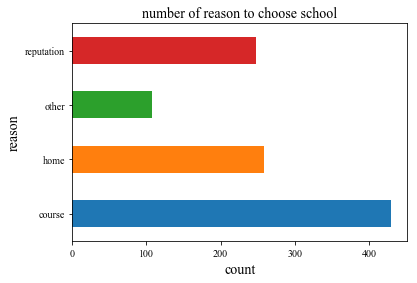

In [23]:
df.groupby('reason').size().plot.barh()
plt.xlabel('count', font2)
plt.ylabel('reason', font2)
plt.title('number of reason to choose school',font2)

## 监护人

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'guardian analysis')

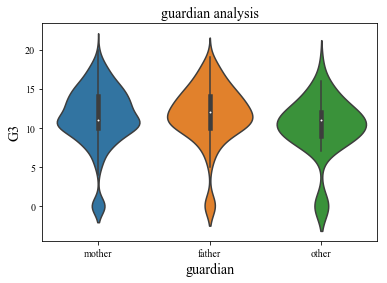

In [33]:
sns.violinplot(x='guardian', y='G3', data=df)
plt.xlabel('guardian', font2)
plt.ylabel('G3', font2)
plt.title('guardian analysis',font2)

## 上学路上的时间

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'traveltime analysis')

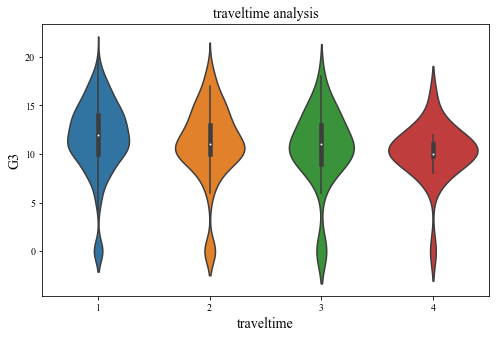

In [47]:
plt.figure(figsize=(8,5))
sns.violinplot(x='traveltime', y='G3', data=df)
plt.xlabel('traveltime', font2)
plt.ylabel('G3', font2)
plt.title('traveltime analysis',font2)

## 额外教育支持

Text(0.5,1,'schoolsup influence')

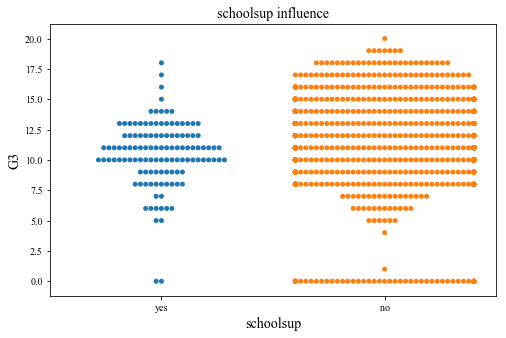

In [8]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='schoolsup', y='G3', data=df)
plt.xlabel('schoolsup', font2)
plt.ylabel('G3', font2)
plt.title('schoolsup influence',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'schoolsup influence violin plot')

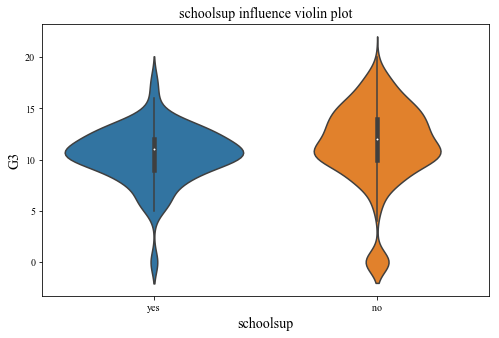

In [9]:
plt.figure(figsize=(8,5))
sns.violinplot(x='schoolsup', y='G3', data=df)
plt.xlabel('schoolsup', font2)
plt.ylabel('G3', font2)
plt.title('schoolsup influence violin plot',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'schoolsup influence violin plot')

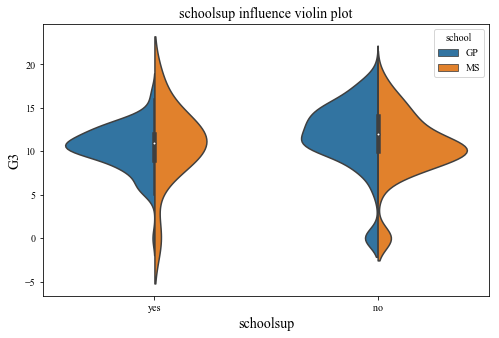

In [12]:
plt.figure(figsize=(8,5))
sns.violinplot(x='schoolsup', y='G3',hue='school', split=True,data=df)
plt.xlabel('schoolsup', font2)
plt.ylabel('G3', font2)
plt.title('schoolsup influence violin plot',font2)

Text(0.5,1,'schoolsup count')

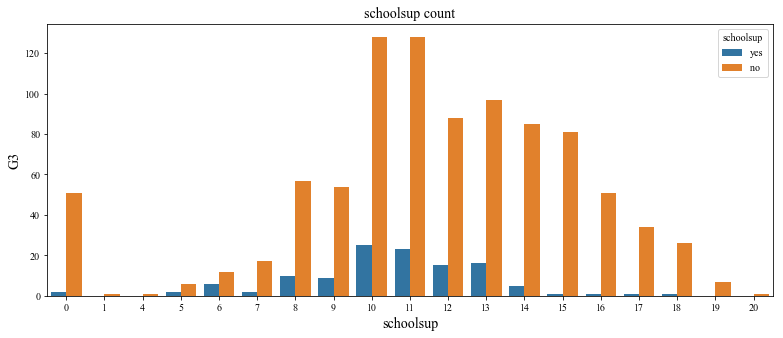

In [10]:
plt.figure(figsize=(13,5))
sns.countplot(x='G3', hue='schoolsup', data=df)
plt.xlabel('schoolsup', font2)
plt.ylabel('G3', font2)
plt.title('schoolsup count',font2)

## 家庭教育支持

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'famsup influence violin plot')

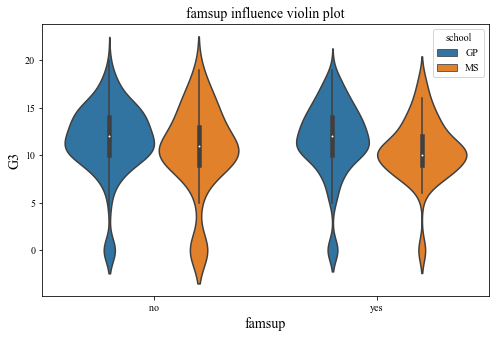

In [14]:
plt.figure(figsize=(8,5))
sns.violinplot(x='famsup', y='G3',hue='school', data=df)
plt.xlabel('famsup', font2)
plt.ylabel('G3', font2)
plt.title('famsup influence distinguished from school',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'famsup influence distinguished from guardian')

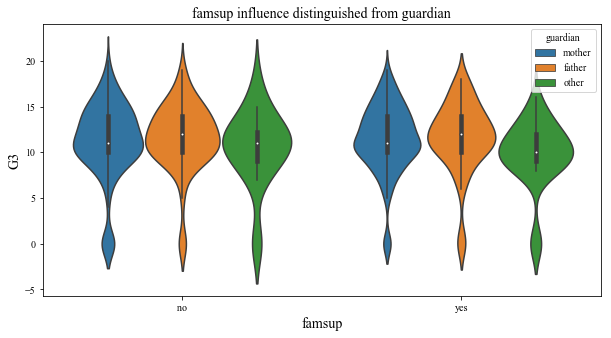

In [17]:
plt.figure(figsize=(10,5))
sns.violinplot(x='famsup', y='G3',hue='guardian', data=df)
plt.xlabel('famsup', font2)
plt.ylabel('G3', font2)
plt.title('famsup influence distinguished from guardian',font2)

## 课程科目内的额外付费课程

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'paid influence')

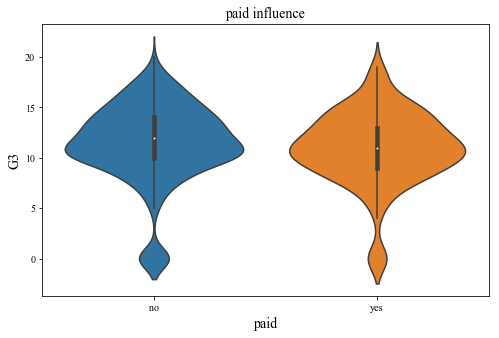

In [22]:
plt.figure(figsize=(8,5))
sns.violinplot(x='paid', y='G3', data=df)
plt.xlabel('paid', font2)
plt.ylabel('G3', font2)
plt.title('paid influence',font2)

Text(0.5,1,'paid influence')

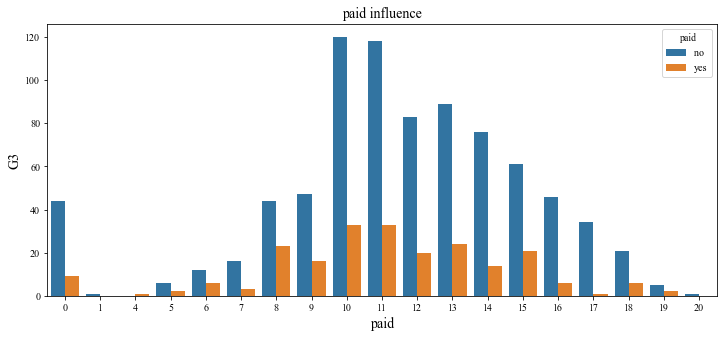

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(x='G3', hue='paid', data=df)
plt.xlabel('paid', font2)
plt.ylabel('G3', font2)
plt.title('paid influence',font2)

## 课外活动

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'activities influence')

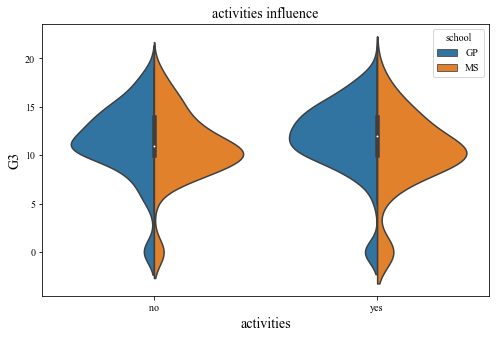

In [31]:
plt.figure(figsize=(8,5))
sns.violinplot(x='activities', y='G3',hue='school', split=True,data=df)
plt.xlabel('activities', font2)
plt.ylabel('G3', font2)
plt.title('activities influence',font2)

Text(0.5,1,'activities influence')

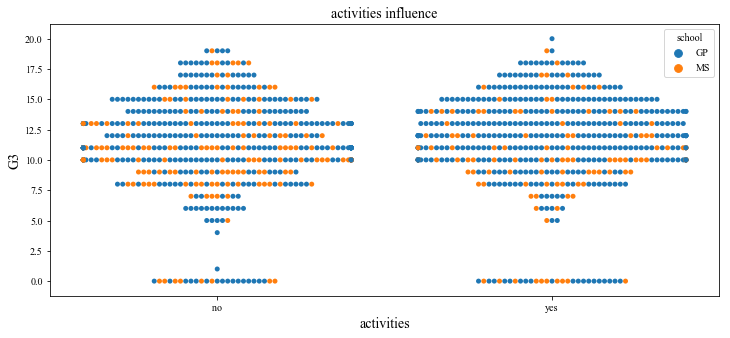

In [34]:
plt.figure(figsize=(12,5))
sns.swarmplot(x='activities', y='G3',hue='school', data=df)
plt.xlabel('activities', font2)
plt.ylabel('G3', font2)
plt.title('activities influence',font2)

## 就读托儿所

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'nursery influence')

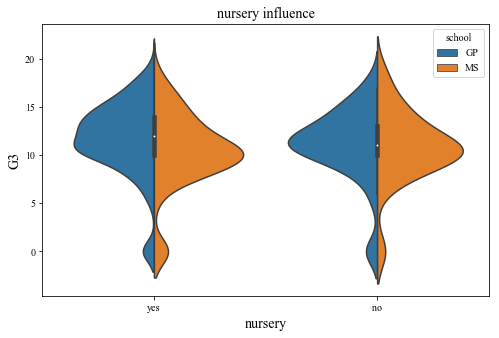

In [36]:
plt.figure(figsize=(8,5))
sns.violinplot(x='nursery', y='G3',hue='school', split=True,data=df)
plt.xlabel('nursery', font2)
plt.ylabel('G3', font2)
plt.title('nursery influence',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'nursery influence on G1')

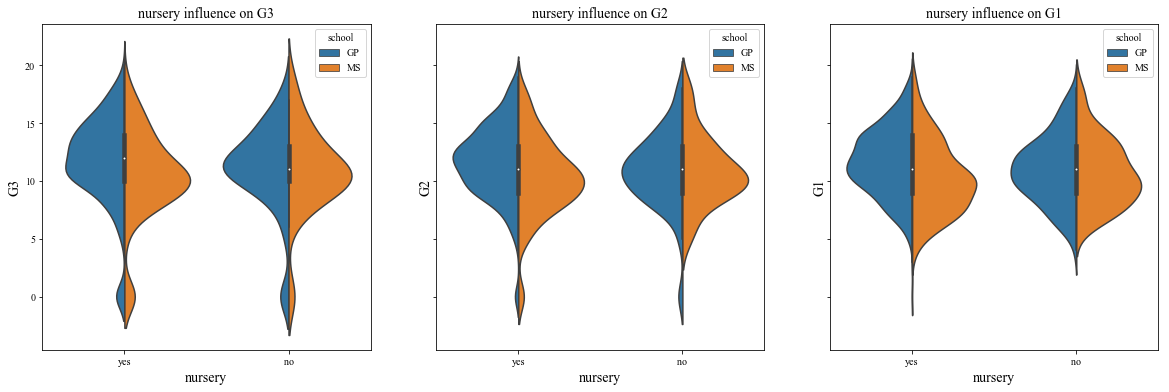

In [57]:
fig,ax = plt.subplots(1,3,sharey = True, figsize=(20,6))
sns.violinplot(x='nursery', y='G3',hue='school', split=True,data=df,ax=ax[0])
ax[0].set_xlabel('nursery', font2)
ax[0].set_ylabel('G3', font2)
ax[0].set_title('nursery influence on G3',font2)
sns.violinplot(x='nursery', y='G2',hue='school', split=True,data=df,ax=ax[1])
ax[1].set_xlabel('nursery', font2)
ax[1].set_ylabel('G2', font2)
ax[1].set_title('nursery influence on G2',font2)
sns.violinplot(x='nursery', y='G1',hue='school', split=True,data=df,ax=ax[2])
ax[2].set_xlabel('nursery', font2)
ax[2].set_ylabel('G1', font2)
ax[2].set_title('nursery influence on G1',font2)

## 希望接受高等教育

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'higher influence')

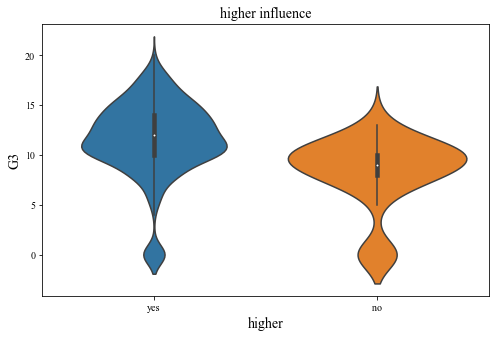

In [58]:
plt.figure(figsize=(8,5))
sns.violinplot(x='higher', y='G3',data=df)
plt.xlabel('higher', font2)
plt.ylabel('G3', font2)
plt.title('higher influence',font2)

D:\anaconda\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'higher influence distinguished from paid')

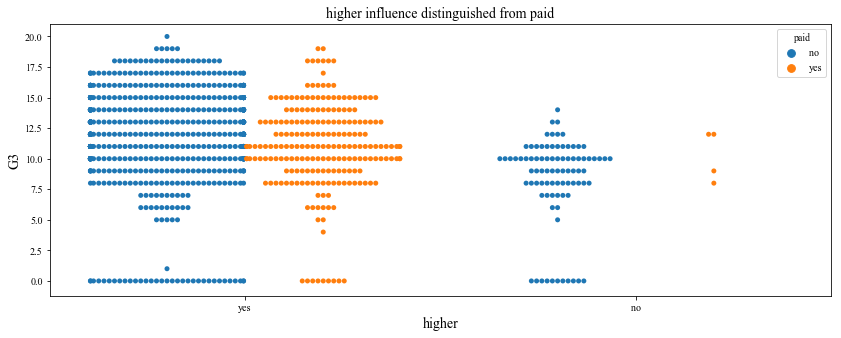

In [66]:
plt.figure(figsize=(14,5))
sns.swarmplot(x='higher', y='G3',hue='paid',split=True,data=df)
plt.xlabel('higher', font2)
plt.ylabel('G3', font2)
plt.title('higher influence distinguished from paid',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'higher influence distinguished from guardian')

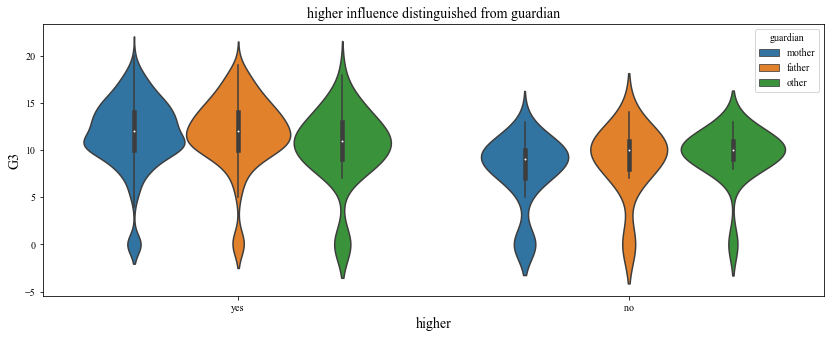

In [68]:
plt.figure(figsize=(14,5))
sns.violinplot(x='higher', y='G3',hue='guardian',data=df)
plt.xlabel('higher', font2)
plt.ylabel('G3', font2)
plt.title('higher influence distinguished from guardian',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'higher influence distinguished from guardian')

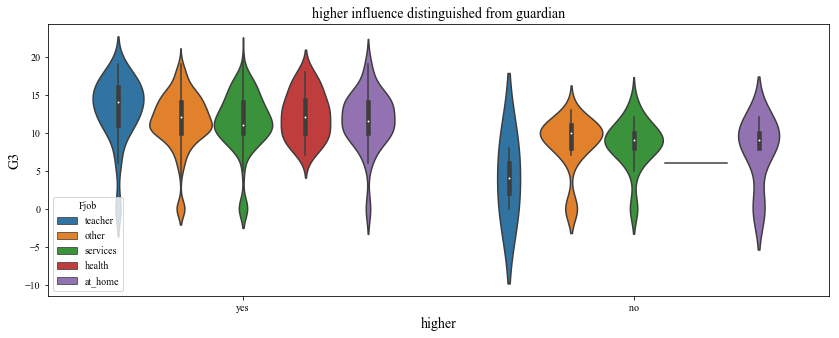

In [73]:
plt.figure(figsize=(14,5))
sns.violinplot(x='higher', y='G3',hue='Fjob',data=df)
plt.xlabel('higher', font2)
plt.ylabel('G3', font2)
plt.title('higher influence distinguished from guardian',font2)

## 家庭互联网接入

Text(0.5,1,'internet influence')

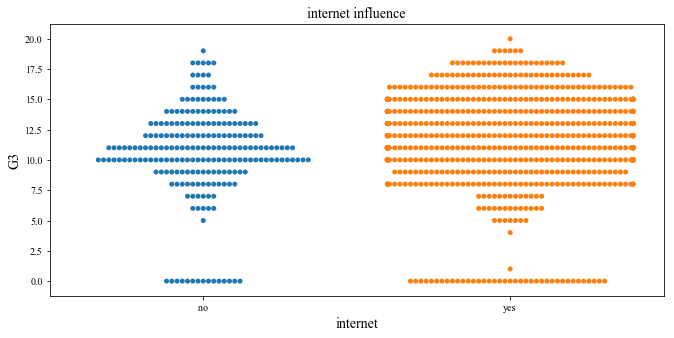

In [77]:
plt.figure(figsize=(11,5))
sns.swarmplot(x='internet', y='G3',data=df)
plt.xlabel('internet', font2)
plt.ylabel('G3', font2)
plt.title('internet influence',font2)

## 与浪漫的关系

Text(0.5,1,'romantic influence')

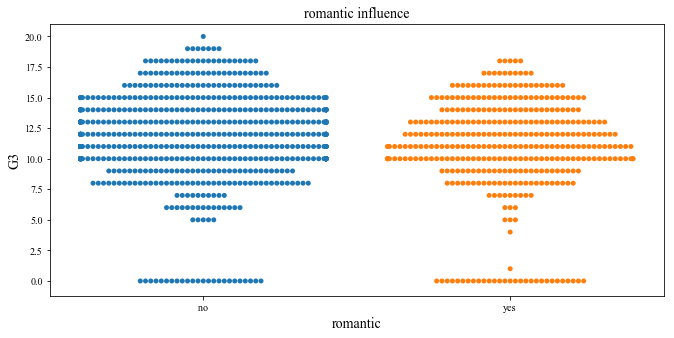

In [80]:
plt.figure(figsize=(11,5))
sns.swarmplot(x='romantic', y='G3',data=df)
plt.xlabel('romantic', font2)
plt.ylabel('G3', font2)
plt.title('romantic influence',font2)

## 家庭关系质量
数字：从1-非常差到5-非常好

Text(0.5,1,'famrel influence')

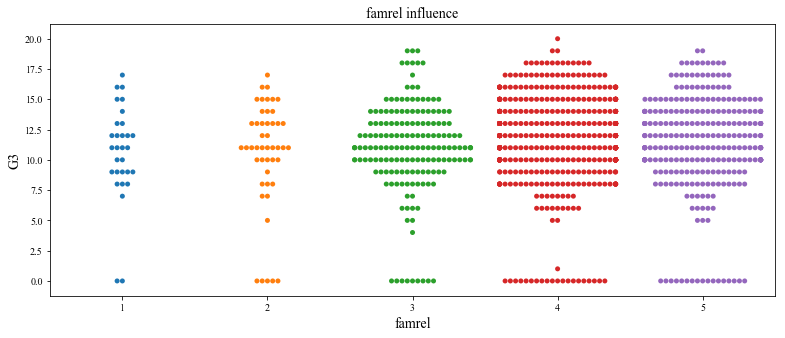

In [83]:
plt.figure(figsize=(13,5))
sns.swarmplot(x='famrel', y='G3',data=df)
plt.xlabel('famrel', font2)
plt.ylabel('G3', font2)
plt.title('famrel influence',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'famrel influence')

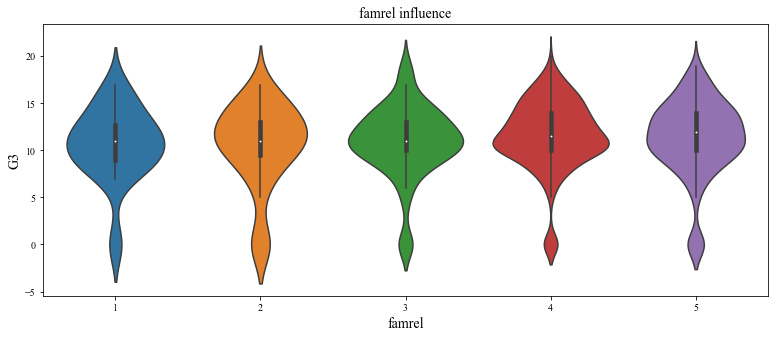

In [86]:
plt.figure(figsize=(13,5))
sns.violinplot(x='famrel', y='G3',data=df)
plt.xlabel('famrel', font2)
plt.ylabel('G3', font2)
plt.title('famrel influence',font2)

## 放学后的自由时间
数字：从1-非常低到5-非常高

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'freetime influence')

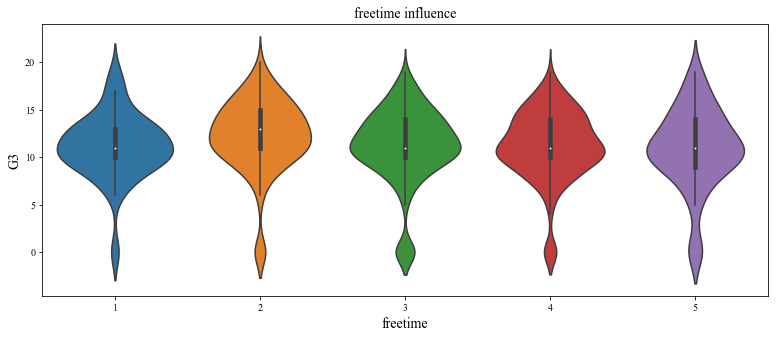

In [87]:
plt.figure(figsize=(13,5))
sns.violinplot(x='freetime', y='G3',data=df)
plt.xlabel('freetime', font2)
plt.ylabel('G3', font2)
plt.title('freetime influence',font2)

Text(0.5,1,'freetime influence')

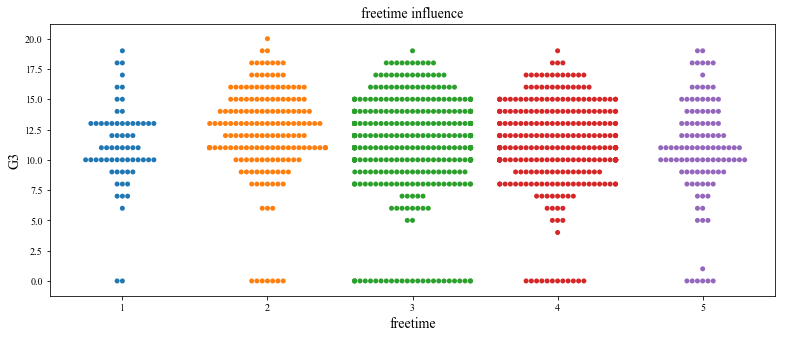

In [88]:
plt.figure(figsize=(13,5))
sns.swarmplot(x='freetime', y='G3',data=df)
plt.xlabel('freetime', font2)
plt.ylabel('G3', font2)
plt.title('freetime influence',font2)

## 和朋友外出
数字：从1-非常低到5-非常高

Text(0.5,1,'goout influence')

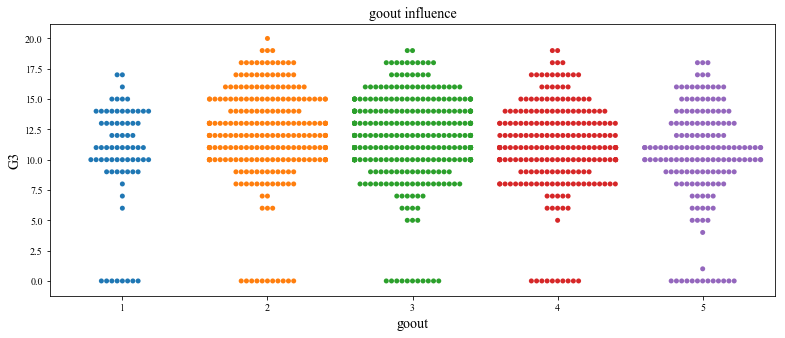

In [89]:
plt.figure(figsize=(13,5))
sns.swarmplot(x='goout', y='G3',data=df)
plt.xlabel('goout', font2)
plt.ylabel('G3', font2)
plt.title('goout influence',font2)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'goout influence violin plot')

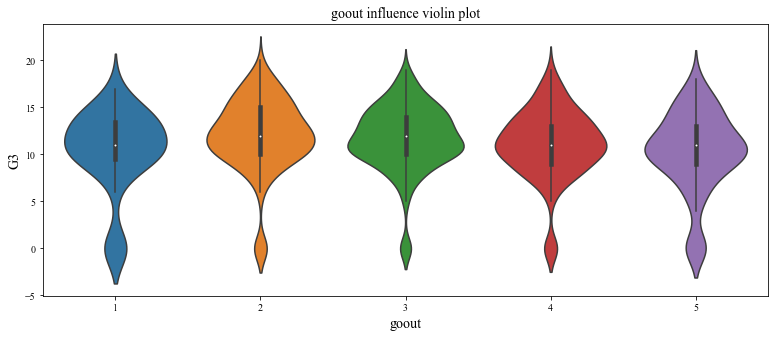

In [91]:
plt.figure(figsize=(13,5))
sns.violinplot(x='goout', y='G3',data=df)
plt.xlabel('goout', font2)
plt.ylabel('G3', font2)
plt.title('goout influence violin plot',font2)

## 工作日酒精消耗量 
数值：从1-非常低到5-非常高

In [101]:
def violin(name,hue=None,split=False):
    plt.figure(figsize=(13,5))
    sns.violinplot(x=name, y='G3',hue=hue,split=split,data=df)
    plt.xlabel(name, font2)
    plt.ylabel('G3', font2)
    plt.title(name+' influence violin plot',font2)
    plt.show()
def swarm(name,hue=None,split=False):
    plt.figure(figsize=(13,5))
    sns.swarmplot(x=name, y='G3',hue=hue,split=split,data=df)
    plt.xlabel(name, font2)
    plt.ylabel('G3', font2)
    plt.title(name+' influence',font2)
    plt.show()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


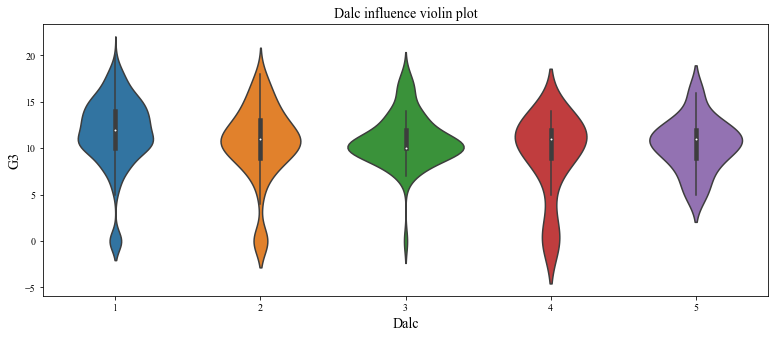

In [94]:
violin('Dalc')

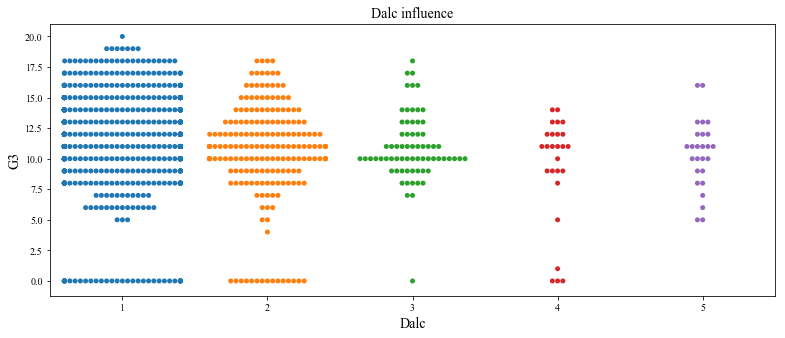

In [95]:
swarm('Dalc')

## 周末饮酒量

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


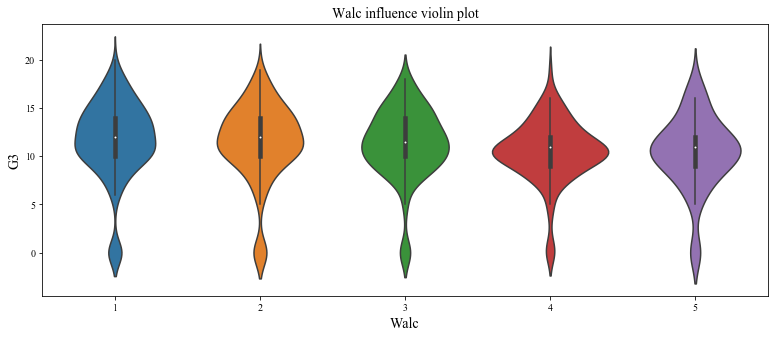

In [98]:
violin('Walc')

D:\anaconda\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


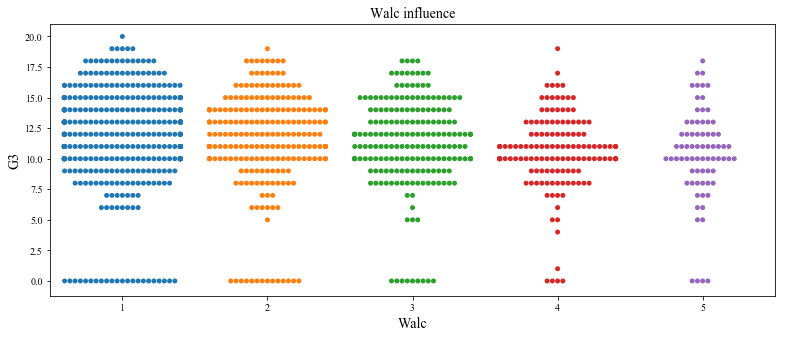

In [99]:
swarm('Walc')

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


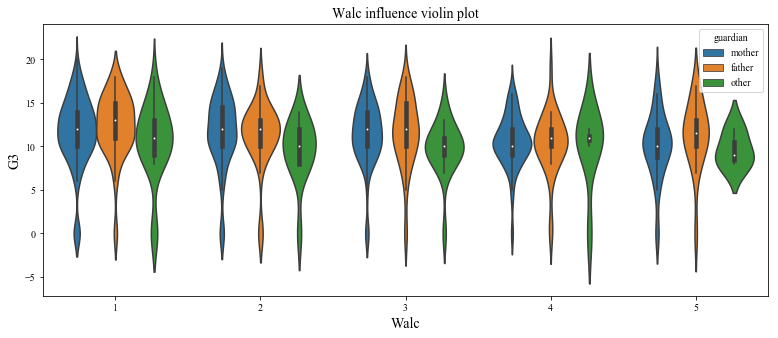

In [102]:
violin('Walc',hue='guardian')  # 父亲的角色对于学生饮酒起到关键作用

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


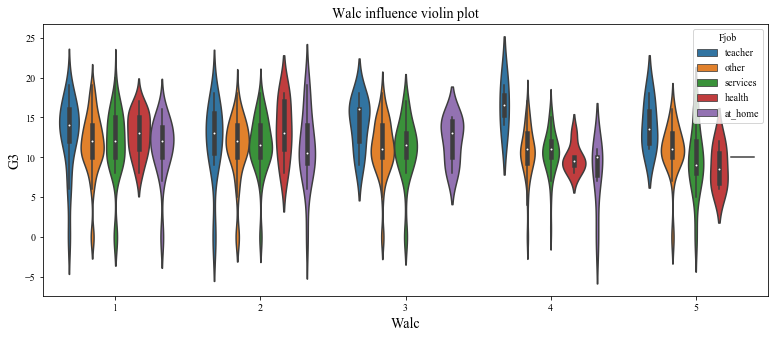

In [106]:
violin('Walc',hue='Fjob')  # very funny

## 当前健康状态
数字：从1-非常差到5-非常好

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


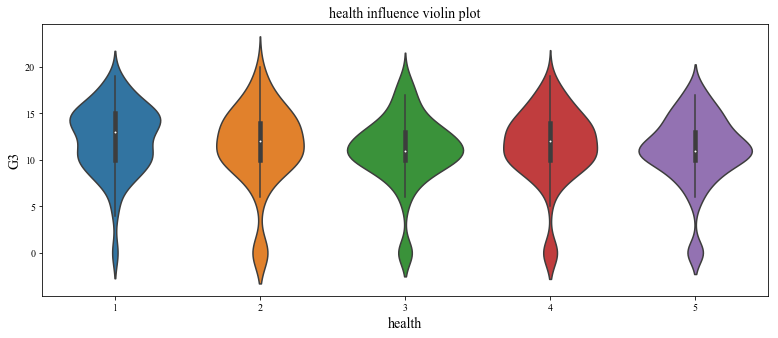

In [104]:
violin('health')

D:\anaconda\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


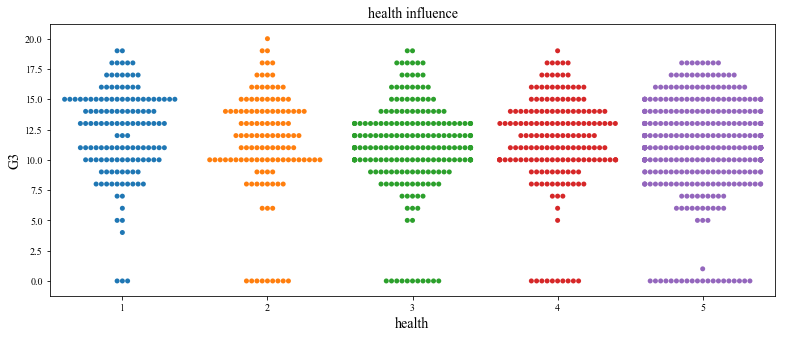

In [105]:
swarm('health')  # 身残志坚

## 学校缺席次数

D:\anaconda\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


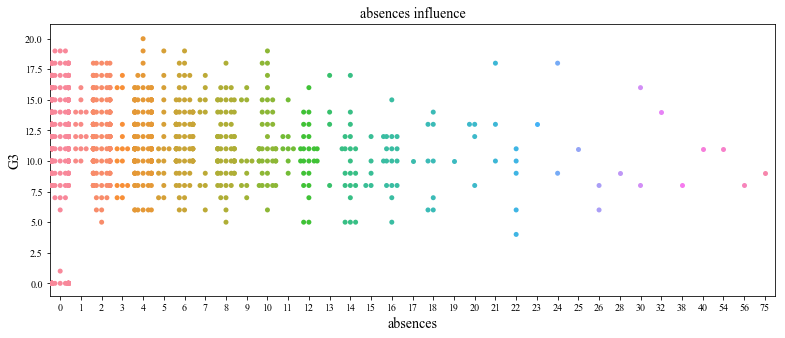

In [108]:
swarm('absences')  # 逃课次数多的也有好学生

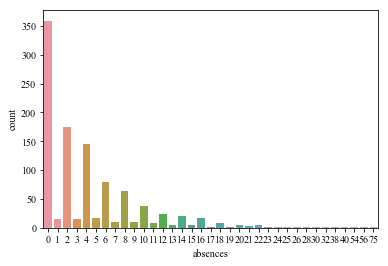

In [109]:
sns.countplot('absences',data=df)  # 都是逃偶数次？？？

# 模型

In [112]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 归一化处理
使数据符合正态分布

In [113]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [114]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [118]:
df_standard = df[['age','Medu','Fedu','traveltime',
    'studytime','failures','famrel','freetime',
    'goout','Dalc','Walc','health','absences',
    'G1','G2','G3']].apply(lambda x:(x-np.mean(x))/np.std(x))

In [119]:
df_standard.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.027889,1.242077,1.466302,0.652210,0.035606,-0.403106,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,0.252155,-2.083727,-1.597738,-1.382871
1,0.221035,-1.426089,-1.262431,-0.715074,0.035606,-0.403106,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.070060,-2.083727,-1.902291,-1.382871
2,-1.392674,-1.426089,-1.262431,-0.715074,0.035606,4.171268,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.896584,-1.413029,-0.988631,-0.347391
3,-1.392674,1.242077,-0.352853,-0.715074,1.234713,-0.403106,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.392275,1.269766,0.838688,0.946958
4,-0.585820,0.352689,0.556724,-0.715074,0.035606,-0.403106,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-1.748378,-0.379525,-0.347391


In [121]:
df_standard.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03
mean,-1.922472e-15,-8.012960e-16,3.535911e-16,3.415744e-16,1.778058e-16,9.443276e-17,-2.040460e-17,-1.850372e-16,2.530968e-16,1.169775e-16,2.258730e-16,3.041416e-17,-8.955427e-17,-3.077572e-16,1.519246e-16,-2.911810e-16
std,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00,1.000479e+00
min,-1.392674e+00,-2.315478e+00,-2.172009e+00,-7.150739e-01,-1.163502e+00,-4.031057e-01,-3.146806e+00,-2.134939e+00,-1.871604e+00,-5.423736e-01,-9.999950e-01,-1.785861e+00,-7.144895e-01,-3.760474e+00,-3.425058e+00,-2.936090e+00
25%,-5.858197e-01,-5.367001e-01,-1.262431e+00,-7.150739e-01,-1.163502e+00,-4.031057e-01,6.878825e-02,-1.950989e-01,-1.003566e+00,-5.423736e-01,-9.999950e-01,-3.813873e-01,-7.144895e-01,-7.423299e-01,-6.840781e-01,-3.473915e-01
50%,2.210349e-01,3.526887e-01,-3.528535e-01,-7.150739e-01,3.560569e-02,-4.031057e-01,6.878825e-02,-1.950989e-01,-1.355271e-01,-5.423736e-01,-2.214754e-01,3.208496e-01,-3.922748e-01,-7.163114e-02,-7.497146e-02,-8.852160e-02
75%,1.027889e+00,1.242077e+00,5.567243e-01,6.522102e-01,3.560569e-02,-4.031057e-01,1.140653e+00,7.748213e-01,7.325115e-01,5.549869e-01,5.570442e-01,1.023086e+00,2.521546e-01,5.990676e-01,5.341352e-01,6.880881e-01
max,4.255308e+00,1.242077e+00,1.466302e+00,3.386778e+00,2.433821e+00,4.171268e+00,1.140653e+00,1.744741e+00,1.600550e+00,3.847069e+00,2.114083e+00,1.023086e+00,1.136856e+01,2.611164e+00,2.361455e+00,2.241307e+00


## One-Hot编码

In [124]:
onehot = pd.get_dummies(df[['school','sex','address',
               'famsize','Pstatus','Mjob',
               'Fjob','reason','guardian',
               'schoolsup','famsup','paid',
              'activities','nursery','higher',
              'internet','romantic']])

## 将归一化和Onehot的数据整合起来

In [126]:
onehot.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0


In [127]:
df_standard.shape

(1044, 16)

In [128]:
onehot.shape

(1044, 43)

In [130]:
df_standard.join(onehot).shape

(1044, 59)

In [132]:
df_standard.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.027889,1.242077,1.466302,0.652210,0.035606,-0.403106,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,0.252155,-2.083727,-1.597738,-1.382871
1,0.221035,-1.426089,-1.262431,-0.715074,0.035606,-0.403106,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.070060,-2.083727,-1.902291,-1.382871
2,-1.392674,-1.426089,-1.262431,-0.715074,0.035606,4.171268,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.896584,-1.413029,-0.988631,-0.347391
3,-1.392674,1.242077,-0.352853,-0.715074,1.234713,-0.403106,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.392275,1.269766,0.838688,0.946958
4,-0.585820,0.352689,0.556724,-0.715074,0.035606,-0.403106,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-1.748378,-0.379525,-0.347391


In [133]:
data = df_standard.join(onehot)

In [134]:
data.shape

(1044, 59)

In [135]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.027889,1.242077,1.466302,0.652210,0.035606,-0.403106,0.068788,-0.195099,0.732511,-0.542374,...,1,0,0,1,0,1,1,0,1,0
1,0.221035,-1.426089,-1.262431,-0.715074,0.035606,-0.403106,1.140653,-0.195099,-0.135527,-0.542374,...,1,0,1,0,0,1,0,1,1,0
2,-1.392674,-1.426089,-1.262431,-0.715074,0.035606,4.171268,0.068788,-0.195099,-1.003566,0.554987,...,1,0,0,1,0,1,0,1,1,0
3,-1.392674,1.242077,-0.352853,-0.715074,1.234713,-0.403106,-1.003076,-1.165019,-1.003566,-0.542374,...,0,1,0,1,0,1,0,1,0,1
4,-0.585820,0.352689,0.556724,-0.715074,0.035606,-0.403106,0.068788,-0.195099,-1.003566,-0.542374,...,1,0,0,1,0,1,1,0,1,0


## 划分训练集测试集

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'kde curve of G3')

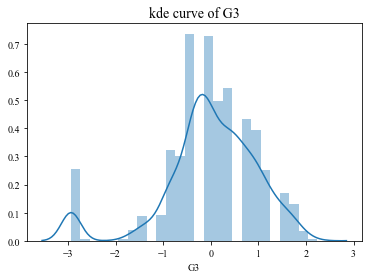

In [139]:
sns.distplot(data['G3'])
plt.title('kde curve of G3',font2)

In [141]:
x = data.drop(['G3'],axis=1)
y = data['G3']

In [188]:
from sklearn.linear_model import Ridge,Lasso,BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

## 建模以及网格搜索

In [200]:
def rmsle_cv(model,n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse.mean(),rmse.std()

In [ ]:
clf = cv(model,param_grid=param_grid, cv=4)

### Ridge Regression

In [150]:
ridge = Ridge()
param = {'alpha':[0.005,0.1,0.5,1]}
clf = GridSearchCV(ridge,param_grid=param, cv=4)
clf.fit(x_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.005, 0.1, 0.5, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [151]:
clf.best_params_

{'alpha': 1}

In [153]:
print('ridge regression best score is :%.4f'%clf.best_score_)

ridge regression best score is :0.8247


In [154]:
clf.grid_scores_

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.82446, std: 0.02599, params: {'alpha': 0.005},
 mean: 0.82448, std: 0.02599, params: {'alpha': 0.1},
 mean: 0.82457, std: 0.02597, params: {'alpha': 0.5},
 mean: 0.82469, std: 0.02595, params: {'alpha': 1}]

### Lasso Regression

In [155]:
lasso = Lasso()
param = {'alpha':[0.005,0.1,0.5,1]}
clf = GridSearchCV(lasso,param_grid=param,cv=4)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.005}

In [159]:
print('lasso regression best score is :%.4f'%clf.best_score_)

lasso regression best score is :0.8342


In [157]:
clf.grid_scores_

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83420, std: 0.02230, params: {'alpha': 0.005},
 mean: 0.82322, std: 0.01596, params: {'alpha': 0.1},
 mean: 0.56207, std: 0.01968, params: {'alpha': 0.5},
 mean: -0.00931, std: 0.00956, params: {'alpha': 1}]

### BayesianRidge Regression

In [168]:
bayes = BayesianRidge()
param = {'n_iter':[200,300,400,500],
        'tol':[1e-4,1e-3,1e-2,1e-1],
        'alpha_1':[1e-7,1e-6,1e-5,1e-4],
        'alpha_2':[1e-7,1e-6,1e-5,1e-4],
        'lambda_1':[1e-7,1e-6,1e-5,1e-4],
        'lambda_2':[1e-7,1e-6,1e-5,1e-4]}
clf = RandomizedSearchCV(bayes,param,cv=4,n_iter=20)
clf.fit(x_train,y_train)
clf.best_params_

{'tol': 0.1,
 'n_iter': 400,
 'lambda_2': 1e-06,
 'lambda_1': 1e-07,
 'alpha_2': 0.0001,
 'alpha_1': 0.0001}

In [169]:
print('bayesianridge regression best score is :%.4f'%clf.best_score_)

bayesianridge regression best score is :0.8256


In [170]:
clf.grid_scores_

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.82562, std: 0.02547, params: {'tol': 0.01, 'n_iter': 200, 'lambda_2': 1e-07, 'lambda_1': 1e-07, 'alpha_2': 1e-06, 'alpha_1': 1e-07},
 mean: 0.82562, std: 0.02547, params: {'tol': 0.1, 'n_iter': 400, 'lambda_2': 1e-05, 'lambda_1': 1e-06, 'alpha_2': 1e-05, 'alpha_1': 1e-07},
 mean: 0.82562, std: 0.02547, params: {'tol': 0.01, 'n_iter': 500, 'lambda_2': 1e-05, 'lambda_1': 0.0001, 'alpha_2': 1e-05, 'alpha_1': 1e-05},
 mean: 0.82562, std: 0.02547, params: {'tol': 0.0001, 'n_iter': 400, 'lambda_2': 1e-05, 'lambda_1': 0.0001, 'alpha_2': 1e-07, 'alpha_1': 1e-07},
 mean: 0.82562, std: 0.02547, params: {'tol': 0.0001, 'n_iter': 300, 'lambda_2': 1e-05, 'lambda_1': 1e-06, 'alpha_2': 0.0001, 'alpha_1': 0.0001},
 mean: 0.82562, std: 0.02547, params: {'tol': 0.1, 'n_iter': 400, 'lambda_2': 1e-06, 'lambda_1': 1e-07, 'alpha_2': 0.0001, 'alpha_1': 0.0001},
 mean: 0.82562, std: 0.02547, params: {'tol': 0.1, 'n_iter': 200, 'lambda_2': 1e-05, 'lambda_1': 1e-05, 'alpha_2': 1e-06, 'alpha_1': 1e-05},

### KernelRigde Regression

In [175]:
kr.get_params()

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'linear',
 'kernel_params': None}

In [177]:
kr = KernelRidge(kernel='polynomial')
param = {'alpha':[0.1,0.5,0.7,1.0],
        'degree':[1.0,2.0,2.5,3,3.5],
         'coef0':[1.0,2.0,2.5,3.0,3.5]
        }
clf = RandomizedSearchCV(kr,param,cv=4,n_iter=20)
clf.fit(x_train,y_train)
clf.best_params_

{'degree': 2.0, 'coef0': 1.0, 'alpha': 0.7}

In [178]:
print('kernelridge regression best score is :%.4f'%clf.best_score_)

kernelridge regression best score is :0.8318


In [179]:
clf.grid_scores_

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80639, std: 0.01892, params: {'degree': 2.0, 'coef0': 1.0, 'alpha': 0.1},
 mean: 0.66375, std: 0.03801, params: {'degree': 3.5, 'coef0': 2.5, 'alpha': 0.1},
 mean: 0.82466, std: 0.02261, params: {'degree': 2.5, 'coef0': 1.0, 'alpha': 0.5},
 mean: 0.70889, std: 0.01736, params: {'degree': 3, 'coef0': 3.0, 'alpha': 0.1},
 mean: 0.81169, std: 0.01979, params: {'degree': 3, 'coef0': 2.5, 'alpha': 1.0},
 mean: 0.78571, std: 0.01430, params: {'degree': 2.5, 'coef0': 1.0, 'alpha': 0.1},
 mean: 0.83135, std: 0.02363, params: {'degree': 2.0, 'coef0': 3.5, 'alpha': 1.0},
 mean: 0.83184, std: 0.02355, params: {'degree': 2.0, 'coef0': 1.0, 'alpha': 0.7},
 mean: 0.82071, std: 0.02108, params: {'degree': 2.5, 'coef0': 3.0, 'alpha': 0.7},
 mean: 0.81315, std: 0.01970, params: {'degree': 2.5, 'coef0': 3.5, 'alpha': 0.5},
 mean: 0.80342, std: 0.01795, params: {'degree': 3, 'coef0': 3.5, 'alpha': 1.0},
 mean: 0.82922, std: 0.02263, params: {'degree': 2.0, 'coef0': 3.0, 'alpha': 0.5},
 mean: 0.7

In [184]:
svr = SVR()
param = {'kernel':['linear','sigmoid','rbf'],'tol':[1e-4,1e-3,1e-2],'C':[0.5,1.0,1.5,2.0],'epsilon':[0.1,0.5,1.0]},
         
clf = GridSearchCV(svr,param,cv=4)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 2.0, 'epsilon': 0.1, 'kernel': 'linear', 'tol': 0.01}

In [185]:
clf.best_score_

0.8243556180504118

In [186]:
param = {'kernel':['poly'],'degree':[2,3,4,5],'tol':[1e-4,1e-3,1e-2],'C':[0.5,1.0,1.5,2.0],'epsilon':[0.1,0.5,1.0]}
clf = GridSearchCV(svr,param,cv=4)
clf.fit(x_train,y_train)
clf.best_params_

{'C': 2.0, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly', 'tol': 0.001}

In [187]:
clf.best_score_

0.8189891742915757

### RandomForestRegressor

In [191]:
rfr.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [193]:
rfr = RandomForestRegressor(criterion='mse')
param = {'n_estimators':[50,100,150,200,250],'max_depth':[2,4,5,7,9]}
clf = GridSearchCV(rfr,param,cv=4)
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 5, 'n_estimators': 250}

In [194]:
clf.best_score_

0.8506900086664398

In [195]:
clf.grid_scores_

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.78082, std: 0.03227, params: {'max_depth': 2, 'n_estimators': 50},
 mean: 0.77548, std: 0.02505, params: {'max_depth': 2, 'n_estimators': 100},
 mean: 0.77672, std: 0.02456, params: {'max_depth': 2, 'n_estimators': 150},
 mean: 0.77446, std: 0.02777, params: {'max_depth': 2, 'n_estimators': 200},
 mean: 0.77693, std: 0.02725, params: {'max_depth': 2, 'n_estimators': 250},
 mean: 0.84763, std: 0.02840, params: {'max_depth': 4, 'n_estimators': 50},
 mean: 0.85061, std: 0.02904, params: {'max_depth': 4, 'n_estimators': 100},
 mean: 0.84954, std: 0.02916, params: {'max_depth': 4, 'n_estimators': 150},
 mean: 0.85069, std: 0.03076, params: {'max_depth': 4, 'n_estimators': 200},
 mean: 0.84967, std: 0.02835, params: {'max_depth': 4, 'n_estimators': 250},
 mean: 0.84868, std: 0.03277, params: {'max_depth': 5, 'n_estimators': 50},
 mean: 0.84999, std: 0.03349, params: {'max_depth': 5, 'n_estimators': 100},
 mean: 0.84976, std: 0.03369, params: {'max_depth': 5, 'n_estimators': 150},
 m

## 构建合集模型
已经找到了每个模型的最佳参数，接下来构建一个合集模型

In [196]:
ridge_ = Ridge(alpha=1)
lasso_ = Lasso(alpha=0.005)
bayes_ = BayesianRidge(tol=0.1, 
                       n_iter=400, 
                       lambda_2=1e-06, 
                       lambda_1=1e-07, 
                       alpha_2=0.0001, 
                       alpha_1=0.0001)
kr_ = KernelRidge(kernel='polynomial',
                  degree= 2.0, 
                  coef0=1.0, 
                  alpha= 0.7)
rfr_ = RandomForestRegressor(n_estimators=250,
                           max_depth=5)


In [208]:
score = rmsle_cv(ridge_)
print("Ridge score: {:.4f} ({:.4f})\n" .format(score[0],score[1]))

Ridge score: 0.4043 (0.0586)



In [209]:
score = rmsle_cv(lasso_)
print("Lasso score: {:.4f} ({:.4f})\n" .format(score[0],score[1]))

Lasso score: 0.3962 (0.0575)



In [210]:
score = rmsle_cv(bayes_)
print("BayesianRidge score: {:.4f} ({:.4f})\n" .format(score[0],score[1]))

BayesianRidge score: 0.4039 (0.0581)



In [211]:
score = rmsle_cv(kr_)
print("KernelRidge score: {:.4f} ({:.4f})\n" .format(score[0],score[1]))

KernelRidge score: 0.3962 (0.0581)



In [212]:
score = rmsle_cv(rfr_)
print("RandomForestRegressor score: {:.4f} ({:.4f})\n" .format(score[0],score[1]))

RandomForestRegressor score: 0.3696 (0.0689)



## 平均融合

In [224]:
from sklearn.metrics import mean_squared_error

In [215]:
ridge_.fit(x_train,y_train)
lasso_.fit(x_train,y_train)
bayes_.fit(x_train,y_train)
kr_.fit(x_train,y_train)
rfr_.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [242]:
pre_train = np.mean(list(zip(ridge_.predict(x_train), 
               lasso_.predict(x_train), 
               bayes_.predict(x_train), 
               kr_.predict(x_train), 
               rfr_.predict(x_train))),axis=1)

平均融合的均方误差比之前每一个模型的均方误差都小

In [249]:
print('在训练集上的数据，平均融合模型的均方误差为%.4f'%mean_squared_error(pre_train,y_train))

在训练集上的数据，平均融合模型的均方误差为0.1203


In [250]:
pre_test = np.mean(list(zip(ridge_.predict(x_test), 
               lasso_.predict(x_test), 
               bayes_.predict(x_test), 
               kr_.predict(x_test), 
               rfr_.predict(x_test))),axis=1)
print('在测试集集上的数据，平均融合模型的均方误差为%.4f'%mean_squared_error(pre_test,y_test))

在测试集集上的数据，平均融合模型的均方误差为0.1867


## stacking 融合
经过验证，很明显，stack融合的模型要比其他的好很多很多

In [227]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list () for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # 使用K-fold的方法来进行交叉验证，将每次验证的结果作为新的特征来进行处理
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],  y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        # 将交叉验证预测出的结果 和 训练集中的标签值进行训练
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    # 从得到的新的特征  采用新的模型进行预测  并输出结果
    def predict(self, X):
        meta_features = np.column_stack ([
            np.column_stack([model.predict (X) for model in base_models]).mean (axis=1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

In [247]:
stack_class = StackingAveragedModels(base_models=(lasso_,bayes_,kr_,rfr_),meta_model=ridge)
stack_class.fit(x_train.values,y_train.values)
print('在训练集上的数据，stacking融合模型的均方误差为%.4f'%mean_squared_error(stack_class.predict(x_train),y_train))

在训练集上的数据，stacking融合模型的均方误差为0.0843


In [248]:
print('在训练集上的数据，stacking融合模型的均方误差为%.4f'%mean_squared_error(stack_class.predict(x_test),y_test))

在训练集上的数据，stacking融合模型的均方误差为0.1673
